In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam, SGD

import warnings 
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Desktop/Training/Datasets/Week14/Churn_Modelling.csv')

In [75]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
#lets remove the CustomerId and Surname as they do no make any impact on the output variable
data.drop(['CustomerId','Surname', 'RowNumber'], axis = 1, inplace = True)

In [78]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


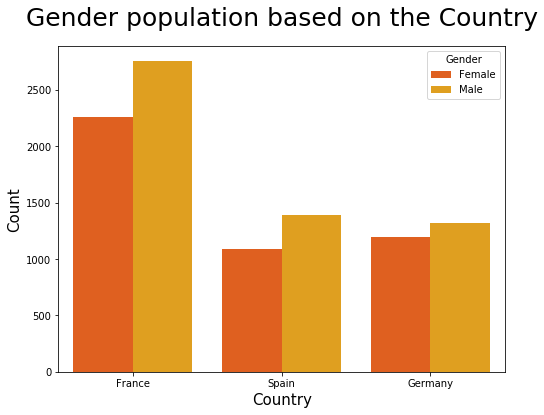

In [79]:
plt.figure(figsize = (8,6))
sea.countplot(data['Geography'], hue = data['Gender'], palette = 'autumn')
plt.title('Gender population based on the Country', fontsize = 25, pad = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

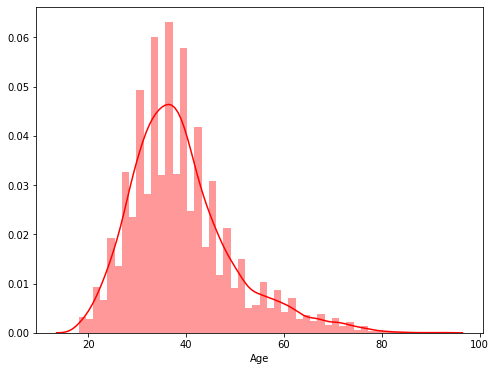

In [80]:
plt.figure(figsize = (8,6))
sea.distplot(data['Age'], bins = 50, color = 'red', kde = True)
plt.show()

From the above plot we can see that most of the ages lie between 25 - 45

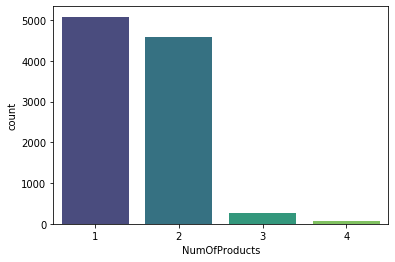

In [81]:
sea.countplot(data['NumOfProducts'], palette = 'viridis')

Products 1 and 2 are clearly dominating over other products
Lets see if Balance has any relation with the products, before that we have to fill the balance values which are zeros.

In [82]:
len(data[data['Balance'] == 0])

3617

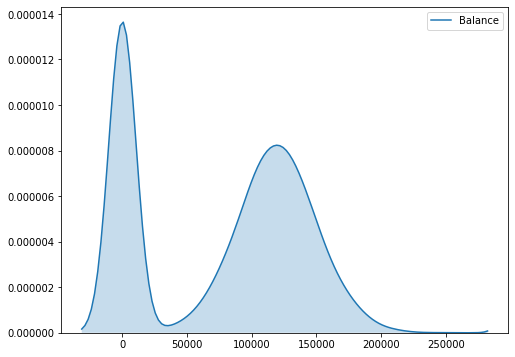

In [83]:
plt.figure(figsize = (8,6))
sea.kdeplot(data['Balance'], shade = True)
plt.show()

Balance column is filled up with lot of zeros. Lets explore more on this column

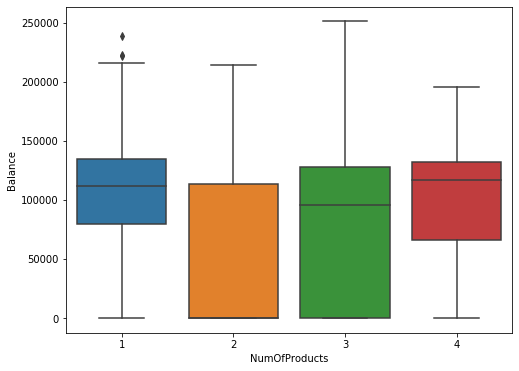

In [84]:
plt.figure(figsize = (8,6))
sea.boxplot(data['NumOfProducts'], data['Balance'])
plt.show()

The above boxplot shows that most of the zeros in the balance column owns exactly 2 Number of products.
Lets confirm this..

In [85]:
(print('Total number of rows that has zero in the balance column {}'.format(sum(data['Balance'] == 0))))
print('Product 1 holds {} zeros'.format(sum((data['NumOfProducts'] == 1) & (data['Balance'] == 0))))
print('Product 2 holds {} zeros'.format(sum((data['NumOfProducts'] == 2) & (data['Balance'] == 0))))
print('Product 3 holds {} zeros'.format(sum((data['NumOfProducts'] == 3) & (data['Balance'] == 0))))
print('Product 4 holds {} zeros'.format(sum((data['NumOfProducts'] == 4) & (data['Balance'] == 0))))

Total number of rows that has zero in the balance column 3617
Product 1 holds 905 zeros
Product 2 holds 2600 zeros
Product 3 holds 98 zeros
Product 4 holds 14 zeros


In [86]:
data['Balance'] = data['Balance'].replace({0:data[data['NumOfProducts'] == 2]['Balance'].mean()})

In [87]:
for j in data['Geography'].unique():
    for g in data['Gender'].unique():
        print('Average salary for {} in {} is {}'.format(g,j,data[(data['Gender'] == g) & (data['Geography'] == j)]['EstimatedSalary'].mean()))

            

Average salary for Female in France is 99564.25275541814
Average salary for Male in France is 100174.2524954595
Average salary for Female in Spain is 100734.1074747474
Average salary for Male in Spain is 98425.68768011522
Average salary for Female in Germany is 102446.42412405722
Average salary for Male in Germany is 99905.03395896652


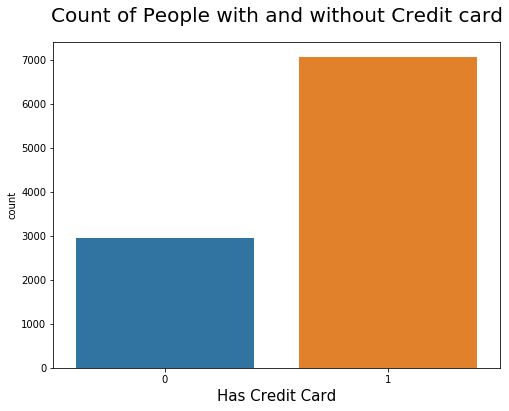

In [88]:
plt.figure(figsize = (8,6))
sea.countplot(data['HasCrCard'])
plt.title('Count of People with and without Credit card', fontsize = 20, pad = 20)
plt.xlabel('Has Credit Card', fontsize = 15)
plt.show()

More than 70 percent of the people has creditcard

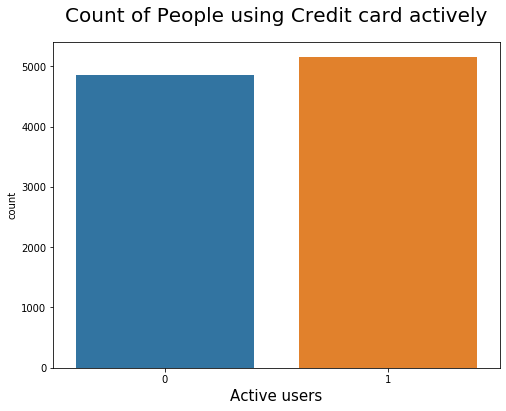

In [89]:
plt.figure(figsize = (8,6))
sea.countplot(data['IsActiveMember'])
plt.title('Count of People using Credit card actively', fontsize = 20, pad = 20)
plt.xlabel('Active users', fontsize = 15)
plt.show()

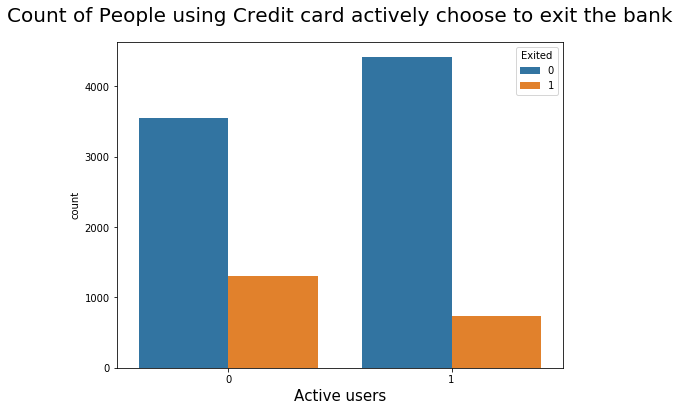

In [90]:
plt.figure(figsize = (8,6))
sea.countplot(data['IsActiveMember'], hue = data['Exited'])
plt.title('Count of People using Credit card actively choose to exit the bank', fontsize = 20, pad = 20)
plt.xlabel('Active users', fontsize = 15)
plt.show()

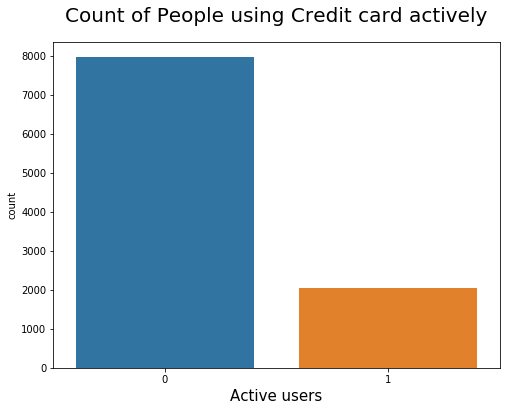

In [91]:
plt.figure(figsize = (8,6))
sea.countplot(data['Exited'])
plt.title('Count of People using Credit card actively', fontsize = 20, pad = 20)
plt.xlabel('Active users', fontsize = 15)
plt.show()

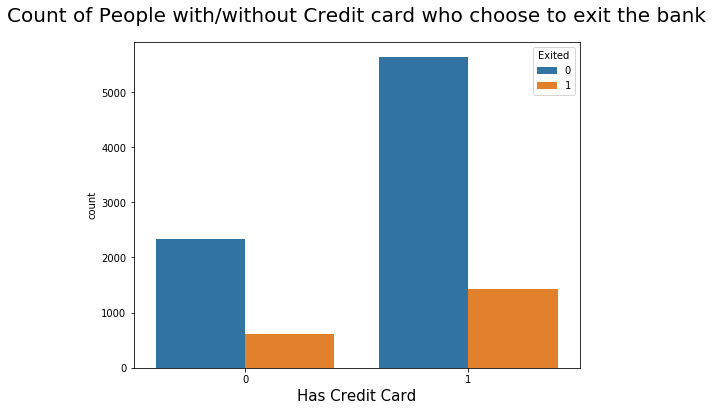

In [92]:
plt.figure(figsize = (8,6))
sea.countplot(data['HasCrCard'], hue = data['Exited'])
plt.title('Count of People with/without Credit card who choose to exit the bank', fontsize = 20, pad = 20)
plt.xlabel('Has Credit Card', fontsize = 15)
plt.show()

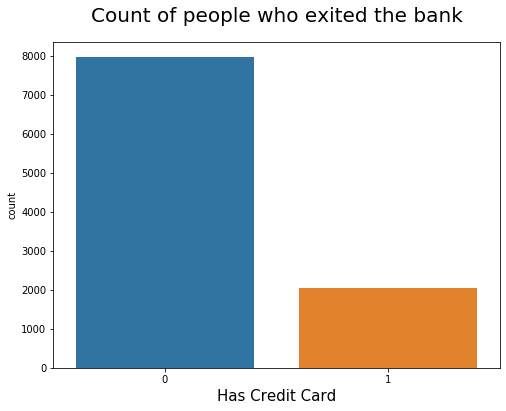

In [94]:
plt.figure(figsize = (8,6))
sea.countplot(data['Exited'])
plt.title('Count of people who exited the bank', fontsize = 20, pad = 20)
plt.xlabel('Has Credit Card', fontsize = 15)
plt.show()

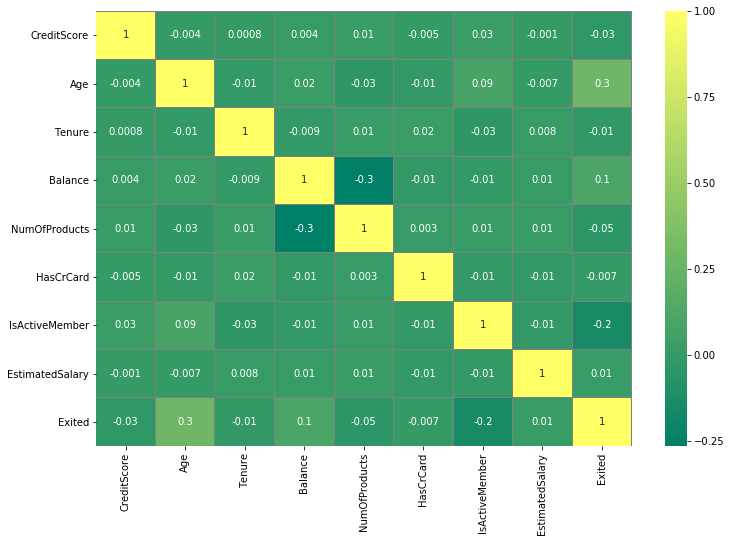

In [95]:
plt.figure(figsize = (12,8))
data_corr = data.corr()
sea.heatmap(data_corr, cmap = 'summer', linewidths = 0.01, linecolor = 'grey', annot = True, fmt = '.1g')
plt.show()

In [96]:
data_copy = data.copy()

In [97]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,51879.145813,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,51879.145813,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [98]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [99]:
lb = LabelEncoder()
data['Gender'] = lb.fit_transform(data['Gender'])
data['Geography'] = lb.fit_transform(data['Geography'])

In [100]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,51879.145813,1,1,1,101348.88,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,0,39,1,51879.145813,2,0,0,93826.63,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.10,0


In [101]:
ohe = OneHotEncoder(categorical_features = [1])
data = ohe.fit_transform(data).toarray()

In [102]:
ohe = OneHotEncoder(categorical_features = [4])
data = ohe.fit_transform(data).toarray()

In [103]:
X = data[:,:-1]
y = data[:,-1]

In [104]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
model = Sequential()

In [33]:
X_train.shape

(7000, 13)

In [38]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=13))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
opt = Adam(learning_rate = 0.01)
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 3,042
Trainable params: 3,042
Non-trainable params: 0
_________________________________________________________________


In [ ]:
65*13

In [ ]:
# Convert labels to categorical one-hot encoding
#one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

In [39]:
y_train = to_categorical(y_train)

In [ ]:
type(y_train)

In [40]:
model.fit(X_train, y_train, batch_size = 10, epochs = 50)


Epoch 1/50
7000/7000 [==============================] - 2s 219us/step - loss: 0.4228 - accuracy: 0.8173
Epoch 2/50
7000/7000 [==============================] - 1s 172us/step - loss: 0.3673 - accuracy: 0.84610s - loss: 0.3614 - accura
Epoch 3/50
7000/7000 [==============================] - 1s 165us/step - loss: 0.3536 - accuracy: 0.8491
Epoch 4/50
7000/7000 [==============================] - 1s 172us/step - loss: 0.3473 - accuracy: 0.8539
Epoch 5/50
7000/7000 [==============================] - 1s 203us/step - loss: 0.3414 - accuracy: 0.8567
Epoch 6/50
7000/7000 [==============================] - 1s 166us/step - loss: 0.3370 - accuracy: 0.8591
Epoch 7/50
7000/7000 [==============================] - 1s 157us/step - loss: 0.3346 - accuracy: 0.8597
Epoch 8/50
7000/7000 [==============================] - 1s 167us/step - loss: 0.3311 - accuracy: 0.8603
Epoch 9/50
7000/7000 [==============================] - 1s 187us/step - loss: 0.3278 - accuracy: 0.8631
Epoch 10/50
7000/7000 [==============

In [106]:
y_pred = model.predict_classes(X_test)

In [107]:
accuracy_score(y_pred, y_test)

0.8456666666666667

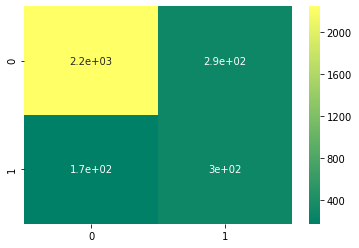

In [108]:
sea.heatmap(confusion_matrix(y_pred, y_test), cmap = 'summer', annot = True)

In [109]:
confusion_matrix(y_pred, y_test)

array([[2242,  289],
       [ 174,  295]])

In [110]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2531
           1       0.51      0.63      0.56       469

    accuracy                           0.85      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.86      0.85      0.85      3000

